In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Загружаем данные
data = pd.read_excel('data.xlsx')
#data = pd.read_csv('data.csv')
data['order_created_datetime'] = pd.to_datetime(data['order_created_datetime'],
                                                format = '%Y-%m-%d %H:%M:%S')
data.head()

,order_created_datetime,brand_name,rest_id,batched_with_order_id,order_id,first_in_multiorder_flg,courier_id,order_items_cnt,city
0,2015-09-15 21:08:43,B,7cc98331ddb8ccffe464455f3df763d9,NaN,0b6f25c79b35fd1e6d28d845b7ee511d,NaN,3f1b96f620988a92d3409ea05e87bd36,3,c6fbacc5cab7e134c9db2a4bbfcc5b64
1,2015-09-13 18:40:12,A,9b73035bb90cd7de4b9c1ff01e44f178,NaN,793f2fa9aa3d52d2da05caa3c30cb77e,NaN,8ed37467dc9b257b3b3bdc1bfebd9b28,8,e6705560085199e9674cd721ee844d0d
2,2015-09-14 01:52:40,A,9b73035bb90cd7de4b9c1ff01e44f178,NaN,b6c5ec927a3e314b0900c103a0cd68fa,NaN,5b17547f825d9cf35c7853621dd842f8,1,e6705560085199e9674cd721ee844d0d
3,2015-09-13 17:23:52,B,7cc98331ddb8ccffe464455f3df763d9,NaN,5dc658f0928569dbefac74c9f311031c,NaN,81647a72700bd46635d9606082360cc8,6,c6fbacc5cab7e134c9db2a4bbfcc5b64
4,2015-09-13 11:15:05,B,7cc98331ddb8ccffe464455f3df763d9,NaN,3da09410aeab781baf4b7039fc9b125c,NaN,065c18216b6d3369d4cc36418c6e80f2,7,c6fbacc5cab7e134c9db2a4bbfcc5b64


In [22]:
# Размеченная часть выборки А с мультизаказами
double_df = data[pd.notna(data['batched_with_order_id'])].reset_index(drop=True) 
# Город с размеченными данными 
city_view = double_df.city.unique()[0]
# Размеченная часть выборки А с одиночными заказами
ones_df = data[(pd.isna(data['batched_with_order_id'])) & (data.brand_name == 'A') & (data.city == city_view)].reset_index(drop=True)  

In [23]:
double_df.head()

,order_created_datetime,brand_name,rest_id,batched_with_order_id,order_id,first_in_multiorder_flg,courier_id,order_items_cnt,city
0,2015-09-13 17:37:08,A,8da96a16838351f6f096d45a4e159f4d,89164b34e9d20a1c1918d156ca7c2b1e,9f8fb710b29202ac3dc36a6712186de4,0.0,2644231e976679c41b15a11524a4e530,8,e6705560085199e9674cd721ee844d0d
1,2015-09-13 11:18:49,A,b3bf2fc20c4646298c05716fbe1aa135,afc4c403cc654734538b007fdbc87664,d887b9731cf06e5dd77623ef5ad56cd8,0.0,8632dc891885aba8e572522dedc7572f,3,e6705560085199e9674cd721ee844d0d
2,2015-09-15 11:55:03,A,2acb4a3db77b139dda1cd6bcbbfd4b8e,986941e665d646910d432b5f48f9b94c,fd0dde82caff2d709ac803c8872fd1e9,0.0,7e8de661602e618fe8cb16c8b3e02a95,3,e6705560085199e9674cd721ee844d0d
3,2015-09-15 17:36:03,A,525505123c94df09ef5b5614e4afe7b2,d469fe73826b9b3f1a3ee58869d91757,b4e39b3e84e81f1ea34c353896ff6853,0.0,876e5276f463736bf52fc540664fd02e,5,e6705560085199e9674cd721ee844d0d
4,2015-09-13 17:08:07,A,680fee36fb26805d3bf7af52cdb44f0f,831b2771564b022030ce699e6807ab03,6efbee90330a0bced1f7938a2e209054,0.0,8a2d57b71452eed5c78c3f81ee2999d2,3,e6705560085199e9674cd721ee844d0d


## Визуальный анализ данных

### Сравнение количества позиций для заказов внутри мультизаказа

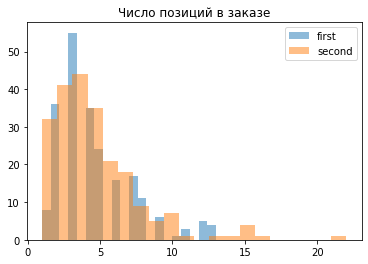

In [24]:
# Сравним первый и второй заказы в мультизаказе
first_in_double = double_df[double_df['first_in_multiorder_flg'] == 1.0].reset_index(drop=True)
second_in_double = double_df[double_df['first_in_multiorder_flg'] == 0.0].reset_index(drop=True)
# Посмотрим на распределение количества позиций в первом и втором заказе
plt.hist(first_in_double.order_items_cnt, alpha = 0.5, bins = 20, label = 'first')
plt.hist(second_in_double.order_items_cnt, alpha = 0.5, bins = 20, label = 'second')
plt.legend(loc='upper right')
plt.title('Число позиций в заказе')
plt.show()

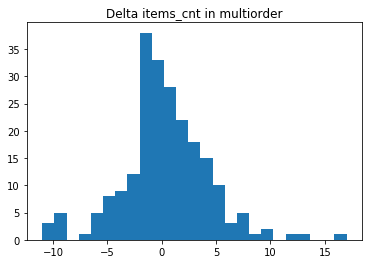

In [43]:
# Проверим, что число позиций в первом заказе меньше, чем во втором
f_m_s_cnt = []
for i in range(len(first_in_double)):
    second = double_df[double_df['order_id'] == first_in_double.loc[i]['batched_with_order_id']]['order_items_cnt'].values[0]
    first = first_in_double.loc[i]['order_items_cnt']
    delta_cnt = second - first
    f_m_s_cnt.append(delta_cnt)
plt.hist(f_m_s_cnt, bins = 25)
plt.title("Delta items_cnt in multiorder")
plt.show()


Распределение разницы в позициях мультизаказа имеет вид, близкий к нормальному симметричному относительно 0. Поэтому гипотеза о связи между количеством позиций в первом и втором заказе мультизаказа не будем далее рассматривать.

### Распределение количества позиций в заказе
Сравним распределение для группы А, разделив на одиночные и мультизаказы, проведем тест Манна-Уитни для оценки однородности распределения количества позиций в заказе для одночных и мультизаказов

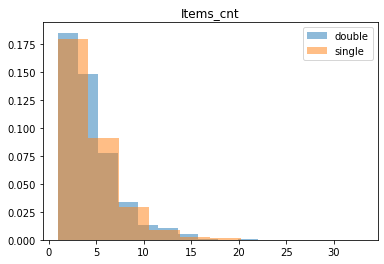

In [44]:
# Посмотрим на распределение количества позиций в первом и втором заказе
plt.hist(double_df.order_items_cnt, alpha = 0.5, label = 'double', density = True)
plt.hist(ones_df.order_items_cnt, alpha = 0.5, label = 'single', density = True)
plt.legend(loc='upper right')
plt.title('Items_cnt')
plt.show()

In [27]:
# Проведем тест Манна-Уитни для сравнения двух распределений по количеству позиций в заказе, считая из независимыми
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(double_df.order_items_cnt, ones_df.order_items_cnt, use_continuity=True, alternative=None)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')


Statistics=979180.500, p=0.483
Same distribution (fail to reject H0)


Полученное значение статистики Манна-Уитни не позволяет нам говорить о различии в распределениях кол-ва позиций в заказе для одиночных и мультизаказов.

### Визуальная оценка данных, сгруппированных по ресторанам
Сгруппируем размеченные данные по ресторанам, внутри ресторана отсортируем по времени заказа и посмотрим на сводные характеристики:
 - среднее время между заказами
 - среднее количество заказов
 - среднее количество позиций в заказе
 - доля мультизаказов
 
Далее, посмотрим на связь этих параметров и попробуем сделать некоторые выводы
 

In [46]:
unique_rest = data[(data.brand_name == 'A') & (data.city == city_view)].rest_id.value_counts()
mean_dt = []
multi_part = []
order_count = []
items_mean = []
multi_order_cnt = []
rest_ind = []
for rest_id in unique_rest.index:
    rest_df = data.loc[data.rest_id == rest_id,:]
    if rest_df.shape[0]>1:
        #rest_id = unique_rest.index[0]
        rest_df = rest_df.sort_values(by = 'order_created_datetime')
        # Разбег времен между заказами
        #rest_df['diff_time'] = rest_df.order_created_datetime.shift(1)
        delta_time =[x.total_seconds() for x in rest_df.order_created_datetime.diff()[1:] if x.total_seconds()]
        #print(delta_time) 
        #break
        rest_ind.append(rest_id)
        mean_dt.append(sum(delta_time)/rest_df.shape[0])
        multi_part.append(rest_df.batched_with_order_id.notna().sum() / rest_df.shape[0])
        multi_order_cnt.append(rest_df.batched_with_order_id.notna().sum())
        order_count.append(rest_df.shape[0])
        items_mean.append(rest_df.order_items_cnt.mean())

df = pd.DataFrame({'mean_dt':mean_dt,'multi_order_cnt':multi_order_cnt,'order_count':order_count,'items_mean':items_mean})
# Количество мультизаказов
df['multi_part'] = df.multi_order_cnt/ df.order_count

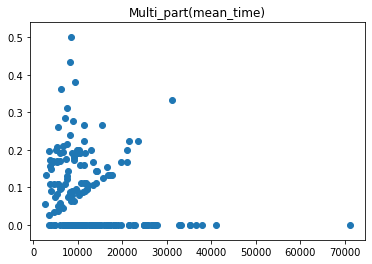

In [47]:
# Доля мультизаказов в зависимости от среднего времени между заказами
plt.scatter(df.mean_dt,df.multi_part)
plt.title('Multi_part(mean_time)')
plt.show()

 Видим, что чем меньше среднее время между заказами, тем выше доля мультизаказов по ресторану

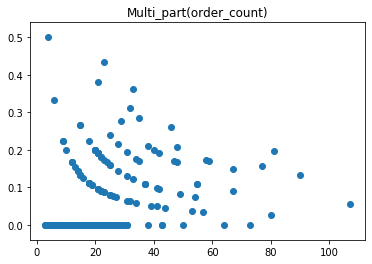

In [52]:
# Доля мультизаказов в зависимости от кол-ва заказов
plt.scatter(order_count,multi_part)
plt.title("Multi_part(order_count)")
plt.show()

Видим, что присутствует обратная зависимость доли мультизаказов от числа заказов по ресторану. Но это связано через то, что чем больше кол-во заказов, тем меньше время ожидания

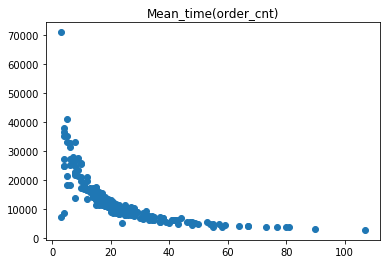

In [51]:
# Число заказов и среднее время ожидания
plt.scatter(order_count,mean_dt)
plt.title("Mean_time(order_cnt)")
plt.show()

Тут мы видим как раз эту обратную зависимость

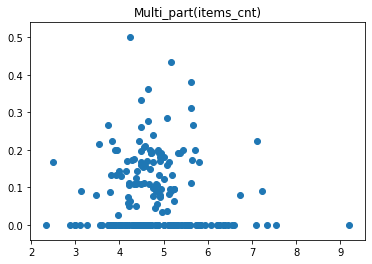

In [50]:
# Доля мультизаказов и среднее кол-во позиций
plt.scatter(items_mean,multi_part)
plt.title("Multi_part(items_cnt)")
plt.show()

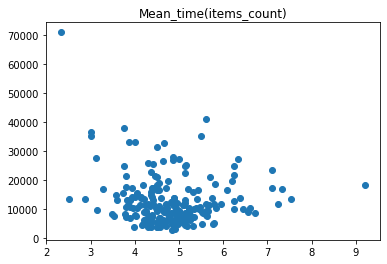

In [53]:
# Кол-во позицй в заказе и среднее время между заказами
plt.scatter(items_mean,mean_dt)
plt.title("Mean_time(items_count)")
plt.show()

### Выводы по визуальному анализу по ресторанам:
Видно, что присутствует зависимость между долей мультизаказов и средним временем ожидания между заказами. Остальные параметры не влияют как на долю мультизаказов по ресторану, поэтому попробуем развить эту гипотезу.

### Сравнение распределения параметров размеченной части выборки А и выборки В

Для этого используем уже использованную группировку по ресторанам в каждой выборке и проанализируем распределения среднего времени между заказами и среднего числа позиций в заказе

In [54]:
# Группируем по ресторанам А
unique_rest = data[(data.brand_name == 'A') & (data.city == city_view)].rest_id.value_counts()
mean_dt = []
multi_part = []
order_count = []
items_mean = []
multi_order_cnt = []
rest_ind = []
for rest_id in unique_rest.index:
    rest_df = data.loc[data.rest_id == rest_id,:]
    if rest_df.shape[0]>1:
        rest_df = rest_df.sort_values(by = 'order_created_datetime')
        delta_time =[x.total_seconds() for x in rest_df.order_created_datetime.diff()[1:] if x.total_seconds()<2*60*60]
        rest_ind.append(rest_id)
        mean_dt.append(sum(delta_time)/rest_df.shape[0])
        multi_part.append(rest_df.batched_with_order_id.notna().sum() / rest_df.shape[0])
        multi_order_cnt.append(rest_df.batched_with_order_id.notna().sum())
        order_count.append(rest_df.shape[0])
        items_mean.append(rest_df.order_items_cnt.mean())
df_A = pd.DataFrame({'mean_dt':mean_dt,'multi_order_cnt':multi_order_cnt,'order_count':order_count,'items_mean':items_mean})
df_A['multi_part'] = df.multi_order_cnt/ df.order_count

# Группируем по ресторанам В
unique_rest = data[(data.brand_name == 'B')].rest_id.value_counts()
mean_dt = []
multi_part = []
order_count = []
items_mean = []
cour_count = []
multi_order_cnt = []
rest_ind = []
for rest_id in unique_rest.index:
    rest_df = data.loc[data.rest_id == rest_id,:]
    if rest_df.shape[0]>1:
        rest_df = rest_df.sort_values(by = 'order_created_datetime')
        delta_time =[x.total_seconds() for x in rest_df.order_created_datetime.diff()[1:] if x.total_seconds()<2*60*60]
        rest_ind.append(rest_id)
        mean_dt.append(sum(delta_time)/rest_df.shape[0])
        multi_part.append(rest_df.batched_with_order_id.notna().sum() / rest_df.shape[0])
        multi_order_cnt.append(rest_df.batched_with_order_id.notna().sum())
        order_count.append(rest_df.shape[0])
        items_mean.append(rest_df.order_items_cnt.mean())
        cour_count.append(rest_df.courier_id.unique().shape[0])
df_B = pd.DataFrame({'mean_dt':mean_dt,'order_count':order_count,'items_mean':items_mean})


Построим распределения сгруппированых по ресторанам данных по среднему времени между заказами и по среднему количеству позиций в заказе:

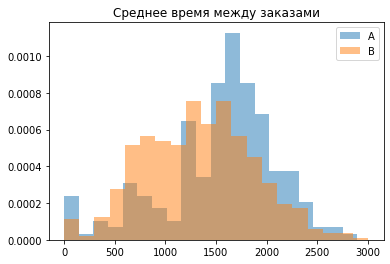

In [36]:
# Среднее время между заказами для группы A и B
plt.hist(df_A.mean_dt,bins = 20,alpha=0.5, label='A',density=True)
plt.hist(df_B.mean_dt, bins = 20, alpha=0.5, label='B',density = True)
plt.title('Среднее время между заказами')
plt.legend(loc='upper right')
plt.show()

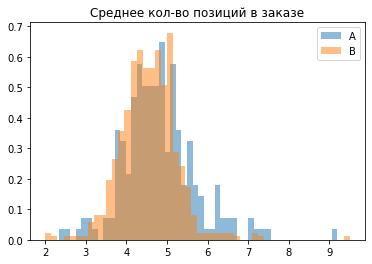

In [55]:
# Распределение среднего кол-ва позиций в заказе
plt.hist(df_A.items_mean,bins = 50, alpha=0.5, label='A',density= True)
plt.hist(df_B.items_mean,bins = 50, alpha=0.5, label='B', density= True)
plt.legend(loc='upper right')
plt.title("Среднее кол-во позиций в заказе")
plt.show()

Исходя из полученных графиков, можно сделать вывод, что распределения в общих чертах похожи. При этом заметно, что среднее время ожидания между заказами для группы B меньше, чем для группы А, что позволяет предполагать большую долю мультизаказов для группы В.

### Оценка среднего времени ожидания между заказами в мультизаказе
Посмотрим на распределение среднего времени ожидания между ресторанами, определим выбросы

Диаграмма размаха до изменений


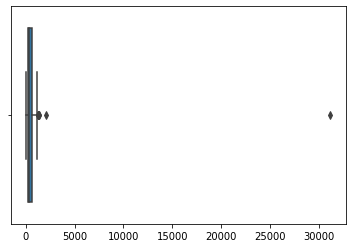


Избавляемся от строк, где есть выбросы, значения 
 которых больше Q3 + 1.5*IQR (1183.500) и меньше Q1 - 1.5*IQR (-428.500).

Диаграмма размаха после изменений


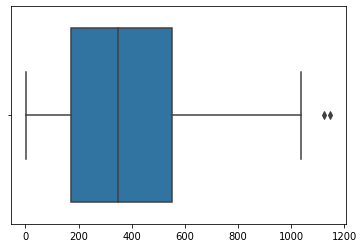


Выбросов обнаружено : 7


In [57]:
intervals = []
for i in range(len(first_in_double)):
    second = double_df[double_df['order_id'] == first_in_double.loc[i]['batched_with_order_id']].values[0][0]
    first = first_in_double.loc[i]['order_created_datetime']
    interval = abs(second - first)
    intervals.append(interval)
intervals = pd.Series(intervals).dt.total_seconds()

def graph_creator(basic_data_frame): 
    print('Диаграмма размаха до изменений')
    openning_number = len(basic_data_frame)
    info = basic_data_frame.describe()# получаем информацию о первом (Q1) и третьем квартилях (Q3)  
    q1 = info[4]
    q3 = info[6]
    iqr = q3 - q1   # считаем межквартильный размах
    border = iqr*1.5   # cчитаем расстояние от Q1 и Q3 до границы, за которой расположены выбросы
    fig, ax = plt.subplots() # строим диаграмму размаха
    plt.ylim(-0.8*border, q3 + border + 0.8*border) 
    ax = sns.boxplot(x=basic_data_frame, ax = ax)
    plt.show()
    print('')
    print('Избавляемся от строк, где есть выбросы, значения \n которых больше Q3 + 1.5*IQR ({:.3f}) и меньше Q1 - 1.5*IQR ({:.3f}).'.format(q3 + border,q1 - border))
    basic_data_frame = basic_data_frame[(basic_data_frame >= (q1 - border))
                                        & (basic_data_frame <= (q3 + border))]
    close_number = len(basic_data_frame)
    values_killed = openning_number - close_number
    print('')
    print('Диаграмма размаха после изменений')
    fig, ax = plt.subplots() # строим диаграмму размаха
    plt.ylim(-0.8*border, q3 + border + 0.8*border) 
    ax = sns.boxplot(x=basic_data_frame, ax = ax)
    plt.show()
    print('')
    print('Выбросов обнаружено : {}'.format(values_killed))
    return basic_data_frame

intervals = graph_creator(intervals)

### Разработка правила для объединения заказов в мультизаказ на основе интервала времени

Построим правило, ориентированное на время между заказами внутри ресторана. По этому правилу оценим долю мультизаказов в группе В.

In [60]:
def return_multi_count(rest_df,delta):
    '''
    rest_df - датасет по ресторану, отсортированный по времени заказов
    delta - время двумя между заказами, при значениях меньше которого мы объединяем их в один
    Функция возвращает количество мультизаказов для ресторана
    '''
    multi_order = 0
    single_order = 0
    all_order = rest_df.shape[0]
    prev_order_time = rest_df.iloc[0,0]
    i = 1
    if rest_df.shape[0] == 1:
        return 0
    else:
        while i < rest_df.shape[0]:
            delta_i = rest_df.iloc[i,0] - prev_order_time           
            if delta_i.seconds < delta:
                multi_order = multi_order + 2
                prev_order_time = rest_df.iloc[i+1,0]
                if i + 2 > rest_df.shape[0]:
                    single_order = single_order + 1
                    print(all_order,single_order + multi_order)
                    break
                i = i + 2
            else:
                single_order = single_order + 1
                prev_order_time = rest_df.iloc[i,0]
                i = i + 1
            if i == rest_df.shape[0]-1:
                single_order = single_order + 1
                break
        return multi_order

В размеченных данных известно, что число мультизаказов равно 442 единицы. Найдем оптимальное значение сдвига во времени, при котором на выборке А в рассматриваемом городе мы получим близкое число мультизаказов

In [61]:
# Тестовая выборка
unique_rest = data[(data.brand_name == 'A') & (data.city == city_view)].rest_id.value_counts()
multi_delta = []
# Рассматриваем различные интервалы между заказами
delta_range = range(10,300,10)
for delta in delta_range:
    multi = 0
    for rest_id_i in unique_rest.index:
        rest_df = data.loc[data.rest_id == rest_id_i,:]
        rest_df = rest_df.sort_values(by = 'order_created_datetime')
        multi += return_multi_count(rest_df,delta)
    multi_delta.append(multi)
    print(f"Интервал = {delta} c, число мультизаказов = {multi}")

Интервал = 10 c, число мультизаказов = 16
Интервал = 20 c, число мультизаказов = 50
Интервал = 30 c, число мультизаказов = 74
Интервал = 40 c, число мультизаказов = 96
Интервал = 50 c, число мультизаказов = 126
Интервал = 60 c, число мультизаказов = 138
Интервал = 70 c, число мультизаказов = 164
Интервал = 80 c, число мультизаказов = 180
Интервал = 90 c, число мультизаказов = 198
Интервал = 100 c, число мультизаказов = 224
Интервал = 110 c, число мультизаказов = 244
Интервал = 120 c, число мультизаказов = 256
Интервал = 130 c, число мультизаказов = 284
Интервал = 140 c, число мультизаказов = 304
Интервал = 150 c, число мультизаказов = 324
Интервал = 160 c, число мультизаказов = 354
Интервал = 170 c, число мультизаказов = 380
Интервал = 180 c, число мультизаказов = 404
Интервал = 190 c, число мультизаказов = 418
Интервал = 200 c, число мультизаказов = 448
Интервал = 210 c, число мультизаказов = 470
Интервал = 220 c, число мультизаказов = 492
Интервал = 230 c, число мультизаказов = 512
И

Таким образом, ближайшим к требуемому значению 442 мультизаказа, оказывается при интервале между заказами, равном 200 секунд.
С помощью этой эвристики оценим долю мультизаказов для выборки В.


In [111]:
unique_rest = data[(data.brand_name == 'B')].rest_id.value_counts()
multi_delta = []
delta = 200
multi = 0
for rest_id_i in unique_rest.index:
    rest_df = data.loc[data.rest_id == rest_id_i,:]
    rest_df = rest_df.sort_values(by = 'order_created_datetime')
    multi += return_multi_count(rest_df,delta)
print(f"Интервал = {delta} c, число мультизаказов = {multi}")
print("Группа B:")
print(f"Интервал = {delta} секунд, кол-во мультизаказов = {multi}")
print(f"Доля мультизаказов B = {multi / data[(data.brand_name == 'B')].shape[0]}")
print("Группа А:")
print(f"Доля мультизаказов A = {double_df.shape[0] / data[(data.brand_name == 'A') & (data.city == city_view)].shape[0]}")

200 18200
Группа B:
Интервал = 200 секунд, кол-во мультизаказов = 18200
Доля мультизаказов B = 0.3202252133368523
Группа А:
Доля мультизаказов A = 0.09061090610906108


Таким образом, эвристика, основанная на времени между заказами, дает нам долю мультизаказов в группе B, равной 32%.

### Применение классификатора для предсказания доли мультизаказов по характеристикам ресторана

По сводным данным по ресторанам, а именно, по среднему времени между заказами и количеству позиций в заказах, была проведена попытка построить классификатор, определяющий кол-во мультизаказов в ресторане.
Для обучения использовалась размеченная часть выборки А. Для каждого ресторана проводилась группировка пар заказов, ближайших по времени. 
Таким образом, признаками являлись:
- разница во времени между заказами;
- кол-во позиций в 1 заказе;
- кол-во позиций во 2 заказае;
Целевым признаком является показатель, объединены ли заказы в мультизаказ (1 - объединены, 0 - нет).

Однако, ни один из методов не дал приемлимой точности.



In [66]:
######################Формирование датасета

data = pd.read_excel('data.xlsx')
data['order_created_datetime'] = pd.to_datetime(data['order_created_datetime'],
                                                format = '%Y-%m-%d %H:%M:%S')
double_df = data[pd.notna(data['batched_with_order_id'])].reset_index(drop=True) # таблица мультизаказов (442 шт)
city_view = double_df.city.unique()[0]
ones_df = data[(pd.isna(data['batched_with_order_id'])) & (data.brand_name == 'A')
               & (data.city == city_view)].reset_index(drop=True)
first_in_double = double_df[double_df['first_in_multiorder_flg'] == 1.0]\
    .reset_index(drop=True)  # таблица заказов, которые
# доставляют первыми из двух в каждом мультизаказе (221 шт)
intervals = []
items_1 = []
items_2 = []
multi_order = []
for i in range(len(first_in_double)):
    second = double_df[double_df['order_id'] == first_in_double.loc[i]['batched_with_order_id']].values[0][0]
    items_in_second = double_df[double_df['order_id'] == first_in_double.loc[i]['batched_with_order_id']].iloc[0]['order_items_cnt']
    first = first_in_double.loc[i]['order_created_datetime']
    items_in_first = first_in_double.loc[i]['order_items_cnt']
    is_multi_order = 1
    interval = (second - first).total_seconds()
    if interval < 0:
        items_1.append(items_in_second)
        items_2.append(items_in_first)
    else:
        items_1.append(items_in_first)
        items_2.append(items_in_second)
    multi_order.append(1)
    intervals.append(abs(interval))

df = pd.DataFrame(list(zip(intervals, items_1, items_2, multi_order)),
               columns =['Intervals', 'items_in_first', 'items_in_second', 'multi_order'])



ones_df = data[(pd.isna(data['batched_with_order_id'])) &
               (data.brand_name == 'A') & (data.city == city_view)].reset_index(drop=True)

rests = ones_df['rest_id'].unique()


intervals = []
items_1 = []
items_2 = []
multi_order = []
for rest in rests:
    one_rest_orders = ones_df[ones_df['rest_id']==rest]
    one_rest_orders = one_rest_orders.sort_values(by=['order_created_datetime'])
    for i in range(len(one_rest_orders)-2):
        for j in range(1, 2):
            intervals.append((one_rest_orders.iloc[i+j]['order_created_datetime'] -
                             one_rest_orders.iloc[i]['order_created_datetime']).total_seconds())
            items_1.append(one_rest_orders.iloc[i]['order_items_cnt'])
            items_2.append(one_rest_orders.iloc[i+j]['order_items_cnt'])
            multi_order.append(0)

single = pd.DataFrame(list(zip(intervals, items_1, items_2, multi_order)),
               columns =['Intervals', 'items_in_first', 'items_in_second', 'multi_order'])

train = pd.concat([df, single])
print("Структура обучающего датасета:")
print(train.sample(5))
train.to_csv("train.csv", index=False)

Структура обучающего датасета:
      Intervals  items_in_first  items_in_second  multi_order
2117      792.0               3               13            0
1121     3957.0              10                3            0
1312     1069.0               3                3            0
2537     1723.0               5                2            0
54        814.0              10                5            1


In [133]:
#########################Обучение классификатора

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

data = pd.read_excel('data.xlsx')
data['order_created_datetime'] = pd.to_datetime(data['order_created_datetime'],
                                                format = '%Y-%m-%d %H:%M:%S')
double_df = data[pd.notna(data['batched_with_order_id'])].reset_index(drop=True)
city_view = double_df.city.unique()[0]

ones_df = data[(pd.isna(data['batched_with_order_id'])) &
               (data.brand_name == 'B') & (data.city == city_view)].reset_index(drop=True)
#ones_df = data[(pd.isna(data['batched_with_order_id'])) &
#               (data.brand_name == 'B')].reset_index(drop=True)
ones_df = ones_df.sort_values(by=['order_created_datetime'])
ones_df = ones_df[0:2000]
rests = ones_df['rest_id'].unique()


intervals = []
items_1 = []
items_2 = []
multi_order = []
id_first = []
id_second = []

for rest in rests:
    one_rest_orders = ones_df[ones_df['rest_id']==rest]
    one_rest_orders = one_rest_orders.sort_values(by=['order_created_datetime'])
    for i in range(len(one_rest_orders)-2):
        for j in range(1, 2):
            intervals.append((one_rest_orders.iloc[i+j]['order_created_datetime'] -
                             one_rest_orders.iloc[i]['order_created_datetime']).total_seconds())
            items_1.append(one_rest_orders.iloc[i]['order_items_cnt'])
            items_2.append(one_rest_orders.iloc[i+j]['order_items_cnt'])
            id_first.append(one_rest_orders.iloc[i]['order_id'])
            id_second.append(one_rest_orders.iloc[i+j]['order_id'])

for_predict = pd.DataFrame(list(zip(intervals, items_1, items_2)),
               columns =['Intervals', 'items_in_first', 'items_in_second'])

ids = pd.DataFrame(list(zip(id_first, id_second, )),
               columns =['id_first', 'id_second'])

train = pd.read_csv('train.csv')

train = train.sample(frac = 1,random_state = 42)

X_train, X_test, Y_train, y_test = train_test_split(train.iloc[:, :-1], train['multi_order'],
                                                                            test_size=0.2, random_state = 42)

######################Оценка качества модели
clf = RandomForestClassifier(class_weight='balanced', random_state = 42)
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)
print(f"F1-score = {f1_score( y_test, y_pred)}")

######################Предсказания для группы B
clf.fit(train.iloc[:, :-1], train['multi_order'])

answer = clf.predict(for_predict)
to_file = pd.DataFrame(list(zip(id_first, id_second, answer)),
               columns =['id_first', 'id_second', 'multi_order'])
to_file.to_csv('answer.csv', index=False)

F1-score = 0.04878048780487805


In [146]:
print(f" Доля мультизаказов в группе В = {sum(answer)*2/ones_df.shape[0]}")

 Доля мультизаказов в группе В = 0.175


In [144]:
to_file = pd.DataFrame(list(zip(intervals, id_first, id_second, answer)),
               columns =['intervals', 'id_first', 'id_second', 'multi_order'])
#to_file.to_csv('answer.csv', index=False)

print(f"Среднее время между заказами на предсказании { to_file[to_file['multi_order']==1]['intervals'].mean()}")


Среднее время между заказами на предсказании 308.62285714285713


Таким образом, полученное качество модели классификатора не позволяет говорить о его применимости для оценки объединения заказов в мультизаказ. 
Применив классификатор в качестве эвристики кол-ва мультизаказов, получаем значение доли мультизаказов в группе B, равное 17,5%.

### Выводы:
На основании проведенного анализа, выдвинута гипотеза, что основным параметром для объединения заказов является время ожидания между заказами внутри ресторана.
По выборке группы А построена эвристика на основе близости доли мультизаказов для расчитанной по эвристике и фактическим данным.

Проведен расчет доли мультизаказов в группе B, которая равна 32%, по сравнению с 9% в группе А для эвристики, основанной только на времени между заказами.

При использовании в качестве эвристики классификатора, доля мультизаказов составляет 17.5%.